In [97]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit

In [98]:
todo=pd.ExcelFile("Datos/Vida_setenta_Hijueputa.xlsx")

In [99]:
todo.sheet_names

['Calibración', 'Zeeman', 'rabii']

In [114]:
Zeeman=pd.read_excel(todo,sheet_name='Zeeman').dropna(how='all')
Zeeman["Error_corriente"] = np.ones(len(Zeeman))*0.001
Zeeman["Error_frecuencia"] = np.ones(len(Zeeman))*5

In [115]:
def model(x,a,b):
    return a*x+b

In [116]:
x_obs_1 = np.array(Zeeman["Corriente pico 1 (A)"])
x_obs_2 = np.array(Zeeman["Corriente pico 2"])
y_obs = np.array(Zeeman["Frecuencia (kHz)"])
popt_1, pcov_1 = curve_fit(model, x_obs_1, y_obs)
popt_2, pcov_2 = curve_fit(model, x_obs_2, y_obs)
perr_1 = np.sqrt(np.diag(pcov_1))
perr_2 = np.sqrt(np.diag(pcov_2))
R2_1=np.abs(pcov_1[1,0]/np.sqrt(pcov_1[0,0]*pcov_1[1,1]))
R2_2=np.abs(pcov_2[1,0]/np.sqrt(pcov_2[0,0]*pcov_2[1,1]))

<ErrorbarContainer object of 3 artists>

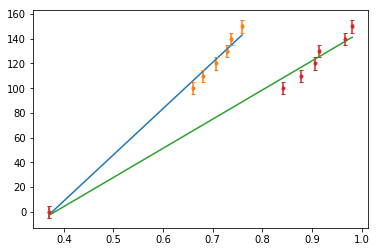

In [124]:
x_1=np.linspace(min(x_obs_1),max(x_obs_1))
x_2=np.linspace(min(x_obs_2),max(x_obs_2))
plt.plot(x_1,model(x_1,*popt_1))
#plt.scatter(x_obs_1,y_obs)
#,yerr=np.array(Zeeman["Error_frecuencia"]),xerr=np.array(Zeeman["Error_corriente"])
plt.errorbar(x_obs_1,y_obs,yerr=np.array(Zeeman["Error_frecuencia"]),xerr=np.array(Zeeman["Error_corriente"]),fmt=".",capsize=2)
plt.plot(x_2,model(x_2,*popt_2))
plt.errorbar(x_obs_2,y_obs,yerr=np.array(Zeeman["Error_frecuencia"]),xerr=np.array(Zeeman["Error_corriente"]),fmt=".",capsize=2)

In [121]:
popt_1[0]/popt_2[0]

1.5860348044896464

In [90]:
Zeeman

,Corriente pico 1 (A),Corriente pico 2,Frecuencia (kHz),Error_corriente,Error_frecuancia
0,0.370,0.370,0,0.001,5.0
1,0.660,0.841,100,0.001,5.0
2,0.680,0.877,110,0.001,5.0
3,0.706,0.905,120,0.001,5.0
4,0.729,0.914,130,0.001,5.0
5,0.737,0.966,140,0.001,5.0
6,0.759,0.981,150,0.001,5.0
